In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_path = "C:\\Users\\Ajit Govind Kulkarni\\train"
valid_path = "C:\\Users\\Ajit Govind Kulkarni\\val"
test_path = "C:\\Users\\Ajit Govind Kulkarni\\test"

# Data Preprocessing

In [3]:
traindatagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
train_batches=traindatagen.flow_from_directory(directory=train_path, target_size=(150, 150), batch_size=10)

Found 3319 images belonging to 12 classes.


In [4]:
valid_datagen = ImageDataGenerator(rescale=1./255)
valid_batches = valid_datagen.flow_from_directory(directory=valid_path,shuffle = False, target_size=(150, 150), batch_size=10)

Found 1431 images belonging to 12 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_batches = test_datagen.flow_from_directory(directory=test_path,shuffle = False, target_size=(150, 150), batch_size=10)

Found 794 images belonging to 1 classes.


In [16]:
# create CNN model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import BatchNormalization
from keras import models, layers, callbacks

model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(5, 5), input_shape=(150,150,3), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))
model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(12, activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 146, 146, 64)      4864      
                                                                 
 batch_normalization_24 (Bat  (None, 146, 146, 64)     256       
 chNormalization)                                                
                                                                 
 conv2d_22 (Conv2D)          (None, 142, 142, 64)      102464    
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 71, 71, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_25 (Bat  (None, 71, 71, 64)       256       
 chNormalization)                                                
                                                      

In [17]:
import keras
import os
import matplotlib.pyplot as plt
from keras.preprocessing import image

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
history = model.fit_generator(train_batches,validation_data=valid_batches, epochs=50)

Epoch 1/50
332/332 [==============================] - 298s 893ms/step - loss: 3.0884 - accuracy: 0.1877 - val_loss: 3.9852 - val_accuracy: 0.1377
Epoch 2/50
332/332 [==============================] - 272s 817ms/step - loss: 2.5116 - accuracy: 0.2838 - val_loss: 1.8487 - val_accuracy: 0.3809
Epoch 3/50
332/332 [==============================] - 294s 885ms/step - loss: 2.2983 - accuracy: 0.3423 - val_loss: 1.4127 - val_accuracy: 0.5521
Epoch 4/50
332/332 [==============================] - 286s 860ms/step - loss: 2.1684 - accuracy: 0.3603 - val_loss: 1.2017 - val_accuracy: 0.6254
Epoch 5/50
332/332 [==============================] - 275s 828ms/step - loss: 2.0471 - accuracy: 0.3835 - val_loss: 1.3635 - val_accuracy: 0.5604
Epoch 6/50
332/332 [==============================] - 293s 881ms/step - loss: 1.9283 - accuracy: 0.4137 - val_loss: 1.3803 - val_accuracy: 0.5535
Epoch 7/50
332/332 [==============================] - 291s 877ms/step - loss: 1.8294 - accuracy: 0.4321 - val_loss: 1.1233 -

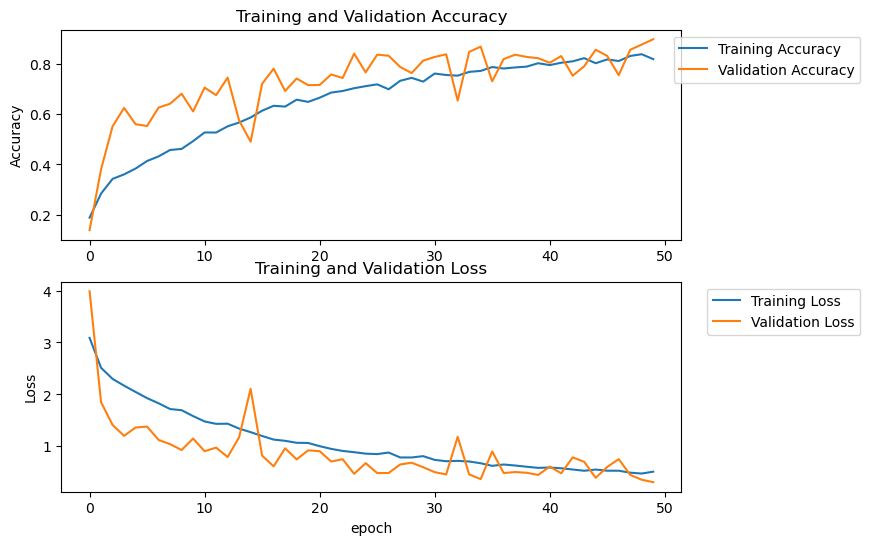

In [19]:
import matplotlib.pyplot as plt

acc      = model.history.history['accuracy']
val_acc  = model.history.history['val_accuracy']
loss     = model.history.history['loss']
val_loss = model.history.history['val_loss']

plt.figure(figsize=(8,6))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(bbox_to_anchor=(1.3, 1),loc='upper right')
plt.ylabel('Accuracy')
# plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(bbox_to_anchor=(1.3, 1),loc='upper right')
plt.ylabel('Loss')
# plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [21]:
model.save('R1_CNN2.h5')
R1CNN2 = tf.keras.models.load_model('R1_CNN2.h5')
predictionsV111 = R1CNN2.predict(x=valid_batches, steps=len(valid_batches), verbose=0)
scores = R1CNN2.evaluate(valid_batches, verbose=0)
print("%s: %.2f%%" % (R1CNN2.metrics_names[1], scores[1]*100))

accuracy: 89.94%


                           precision    recall  f1-score   support

              Black-grass       0.64      0.62      0.63        79
                 Charlock       0.86      0.92      0.89       117
                 Cleavers       1.00      0.69      0.82        87
         Common Chickweed       0.93      0.97      0.95       184
             Common wheat       0.95      0.90      0.92        67
                  Fat Hen       0.95      0.96      0.95       143
         Loose Silky-bent       0.87      0.84      0.85       197
                    Maize       0.84      0.99      0.90        67
        Scentless Mayweed       0.91      0.95      0.93       155
          Shepherds Purse       0.83      0.81      0.82        70
Small-flowered Cranesbill       0.99      0.97      0.98       149
               Sugar beet       0.92      0.98      0.95       116

                 accuracy                           0.90      1431
                macro avg       0.89      0.88      0.88    

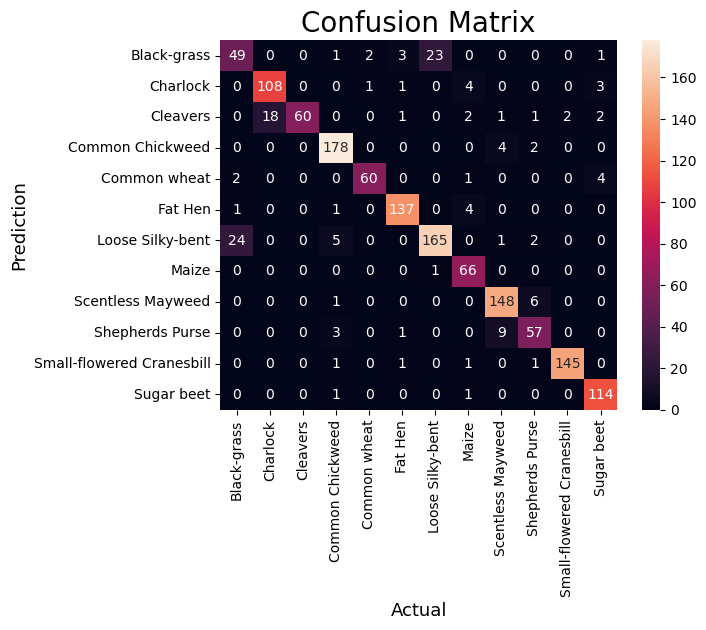

In [43]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import itertools
import seaborn as sns

target_names = ['Black-grass','Charlock','Cleavers','Common Chickweed','Common wheat','Fat Hen', 'Loose Silky-bent',
                'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']

y_true=valid_batches.classes 
y_pred=predictionsV111.argmax(axis=1)

# Classification Report
print(classification_report(y_true, y_pred, target_names=target_names))

# Confusion Matrix
#compute the confusion matrix.
cm = confusion_matrix(y_true,y_pred)
 
#Plot the confusion matrix.
fig=sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Black-grass','Charlock','Cleavers','Common Chickweed','Common wheat','Fat Hen', 'Loose Silky-bent',
                'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet'],
            yticklabels=['Black-grass','Charlock','Cleavers','Common Chickweed','Common wheat','Fat Hen', 'Loose Silky-bent',
                'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=20)
plt.show()

In [44]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [45]:
test_batches.filenames[:5]

['test\\0021e90e4.png',
 'test\\003d61042.png',
 'test\\007b3da8b.png',
 'test\\0086a6340.png',
 'test\\00c47e980.png']

In [46]:
preds_cls_idx = predictions.argmax(axis=-1)

In [47]:
# https://stackoverflow.com/questions/57516673/how-to-perform-prediction-using-predict-generator-on-unlabeled-test-data-in-kera
import numpy as np
idx_to_cls = {v: k for k, v in train_batches.class_indices.items()}
preds_cls = np.vectorize(idx_to_cls.get)(preds_cls_idx)
filenames_to_cls = list(zip(test_batches.filenames, preds_cls))

In [48]:
filenames_to_cls[:5]

[('test\\0021e90e4.png', 'Small-flowered Cranesbill'),
 ('test\\003d61042.png', 'Fat Hen'),
 ('test\\007b3da8b.png', 'Sugar beet'),
 ('test\\0086a6340.png', 'Common Chickweed'),
 ('test\\00c47e980.png', 'Sugar beet')]

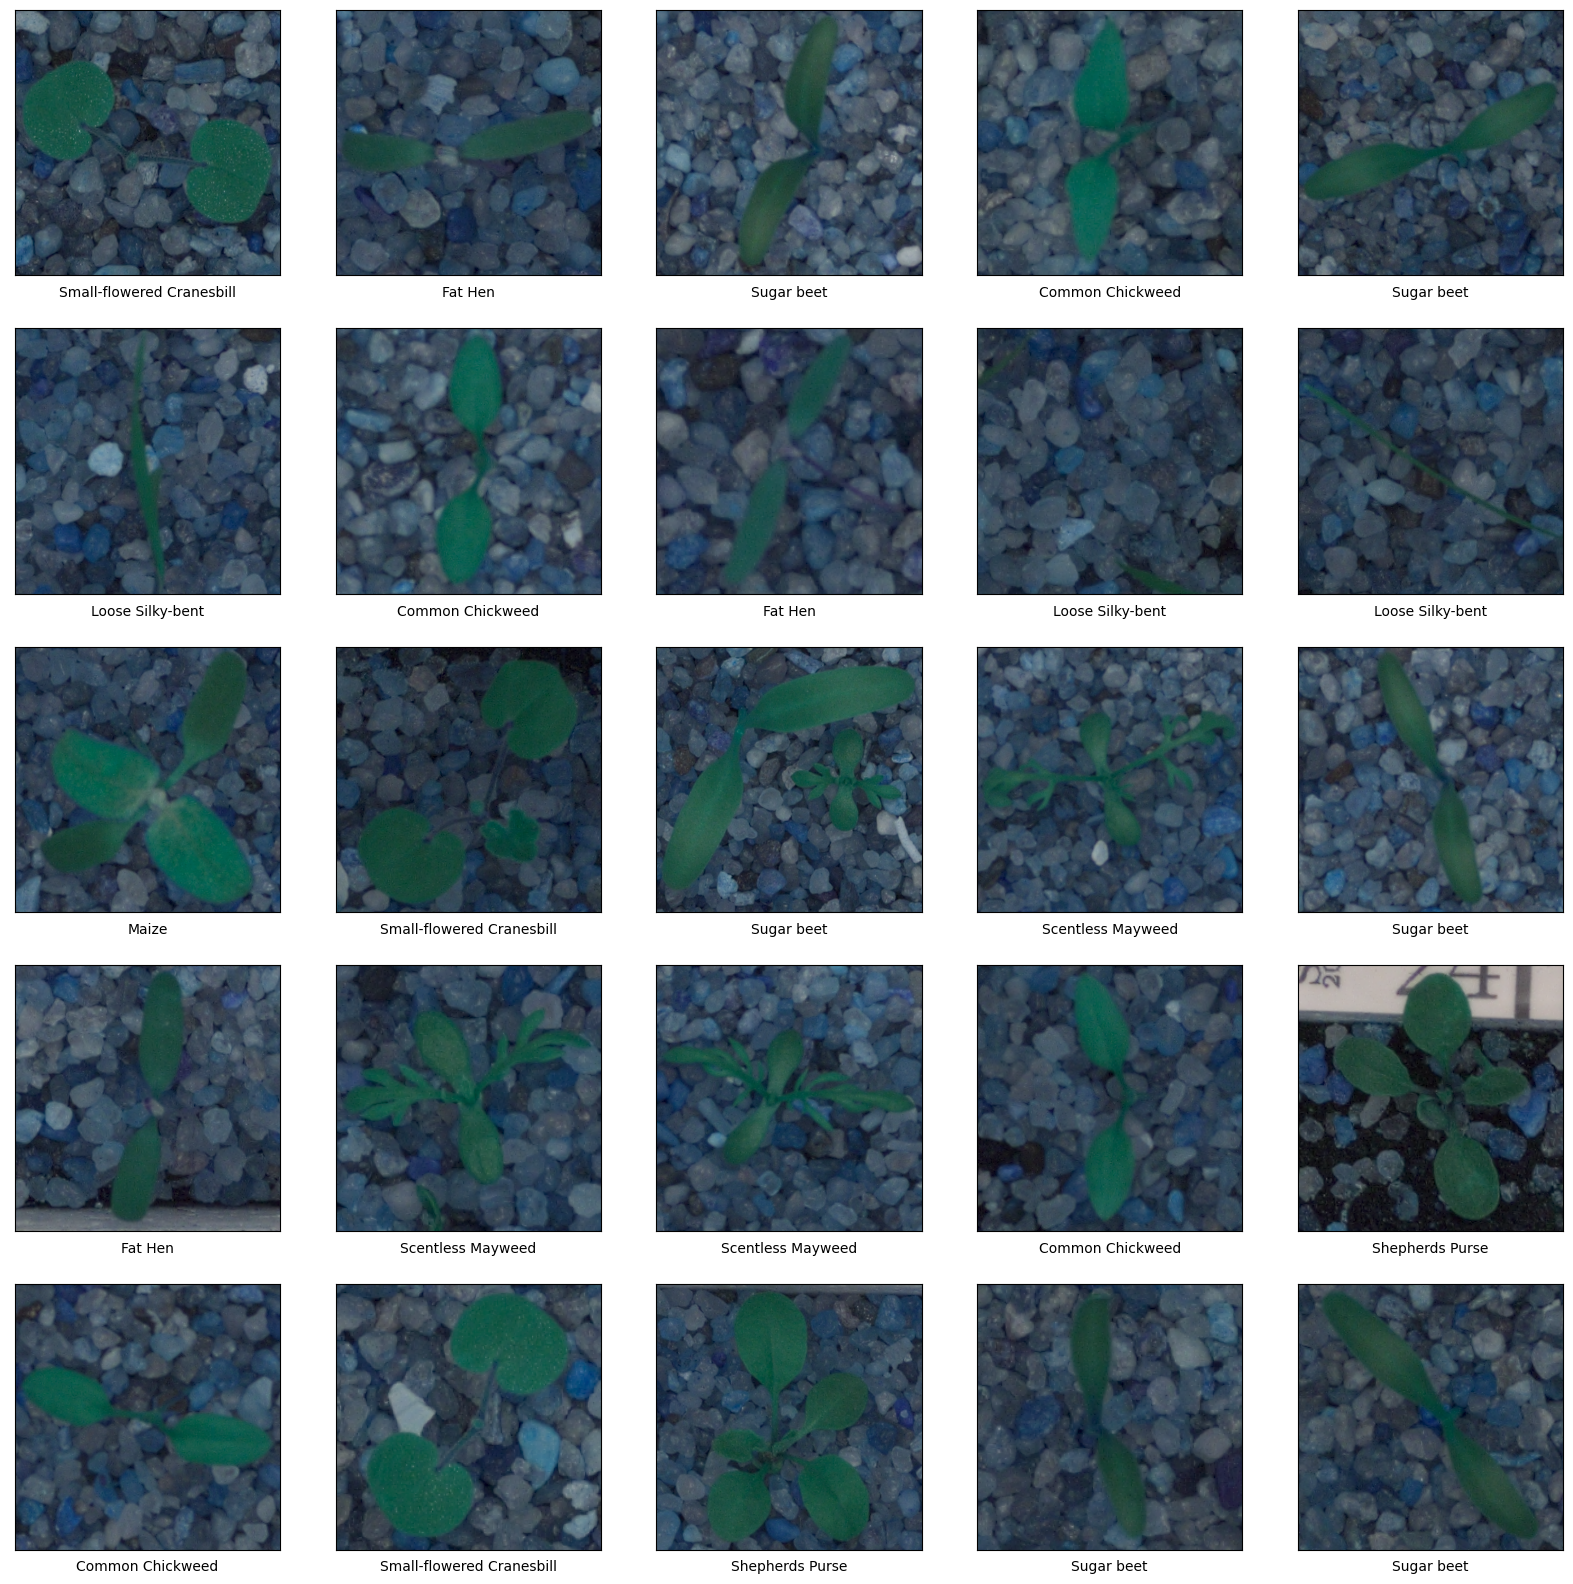

In [61]:
import cv2 as cv
plt.figure(figsize=(20,20))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img = cv.imread(r'test\\'+ filenames_to_cls[i][0])
    plt.imshow(img)
    plt.xlabel(filenames_to_cls[i][1])
plt.show()